# Identification of Potential Inhibitors for Tyrosine Kinase Enzyme Using Machine Learning Part 1 - Data Collection and Preprocessing

---

## 1. Introduction

Protein kinases orchestrate the activation of signalling cascades in response to extracellular and intracellular stimuli to control cell growth, proliferation, and survival (1). These enzymes function by transferring phosphate groups from ATP to specific substrates, a process known as phosphorylation (2). Dysregulation of kinase activity is closely associated with many diseases, particularly cancer, where abnormal signaling pathways lead to uncontrolled cell proliferation (3). As a result, kinases have emerged as significant drug targets, especially in oncology.

Tyrosine kinase inhibitors (TKIs) are one of the most successful examples of targeted cancer therapies. These small molecules work by selectively inhibiting the activity of overexpressed or mutated kinases in tumor cells (4). Prominent examples include imatinib, which targets BCR-ABL in chronic myeloid leukemia, and erlotinib, which targets EGFR in non-small cell lung cancer (5,6). The success of these inhibitors has stimulated further research into the development of kinase-targeted therapies for other diseases.

Machine learning, when integrated with cheminformatics, offers a powerful tool for accelerating the drug discovery process (7). By leveraging large bioactivity datasets, machine learning models can predict potential drug candidates with increased accuracy and efficiency (8). This reduces the need for traditional high-throughput experimental screening, significantly cutting down on both time and costs in early-stage drug development.

### 1.1 Aim of the Project

The project's goal ois to create predictive pipeline for identifying novel *Tyrosine Kinase* inhibitors by utilizing machine learning techniques to analyze bioactivity and molecular sequesnce data.

I will gather data from **ChEMBL and UniProt** and generate molecular descriptors using **PaDEL-Descriptors**. The processed data will be used to train models to predict the inhibitory potential of compounds. The best-performing model will be validated and applied to predict new inhibitors, with the objective of contributing to the drug discovery pipeline for Tyrosine Kinase-targeted therapies.

### 1.2 Project Outline

#### 1. Data Collection
- Collect bioactivity data for Tyrosine Kinase inhibitors from **ChEMBL**.
- Obtain relevant molecular seuence data from **UniProt**.

#### 2. Data Pre-processing
- Clean and preprocess the raw bioactivity data.
- Generate molecular descriptors using PaDEL-Descriptor.
- Normalize the dataset.

#### 3. Model Development and Validation
- Implement machine learning models.
- Train models on the molecular descriptors to predict pIC50 values(inhibitory activity).
- Use cross-validation and test sets to evaluate the models.
- Select the best-performing model based on predictive accuracy and R² score.

#### 4. Prediction and Analysis
- Use the validated model to predict new potential inhibitors.
- Analyze the model's performance and its implication.

***

## 2. Initialization

First, installing useful llibraries.

### 2.1 Installing libraries

Install the ChEMBL web service package and PubChempy to retrieve bioactivity data from the ChEMBL and PubChem Database.

In [18]:
# Installing libraries
!pip install chembl-webresource-client pandas

### 2.2 Importing Libraries

In [19]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from chembl_webresource_client.new_client import new_client
import requests

print('Import success!')

Import success!


## 3. Data Collection

### 3.1 Downloading Data from ChEMBL

In [20]:
# Search for tyrosine kinase target in ChEMBL
target = new_client.target
tyrosine_kinase = target.search('Tyrosine Kinase')
tyrosine_kinase_target = tyrosine_kinase[0] # select the first result

# Retrieve bioactivity data for the target
activity = new_client.activity
bioactivity_data = activity.filter(target_chembl_id=tyrosine_kinase_target['target_chembl_id'])

# Convert to DataFrame
bioactivity_df = pd.DataFrame(bioactivity_data)
bioactivity_df.to_csv("chembl_bioactivity_data_tyrosine_kinase.csv", index=False)


In [21]:
# show sample data of bioactivity_df
bioactivity_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Active,1650342,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
1,None,None,1650343,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,uM,UO_0000065,None,0.19
2,None,Not Active,1650344,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
3,None,Not Active,1650345,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
4,None,Not Active,1650346,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,None,Not Active,24648640,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5059693,FRK DiscoveRx kinase panel,B,None,None,BAO_0000201,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,% inhibition,%,UO_0000187,None,85.0
2280,None,None,24957969,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5212882,Selectivity interaction (Ambit kinome screenin...,B,None,None,BAO_0000179,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,% of control,%,UO_0000187,None,0.55
2281,None,None,24958145,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5212940,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,% of control,%,UO_0000187,None,10.0
2282,None,None,24958174,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5213173,Selectivity interaction (Z’-LYTE assay (Select...,B,None,None,BAO_0000192,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Ki,nM,UO_0000065,None,53.0


### 3.2 Downloading Data from UniProt

In [22]:
# Correct UniProt API URL for tyrosine kinase data in TSV format
url = "https://rest.uniprot.org/uniprotkb/search?query=tyrosine+kinase&format=tsv&fields=accession,id,protein_name,organism_name,length,sequence"

# Perform the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Saving the data to a CSV file
    with open('uniprot_tyrosine_kinase_data.csv', 'w') as f:
        f.write(response.text)
    
    print("Data downloaded and saved successfully.")
    
    # Loading the data into a DataFrame for viewing
    uniprot_data = pd.read_csv('uniprot_tyrosine_kinase_data.csv', delimiter='\t')
    print(uniprot_data.head())  # Display the first few rows
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Data downloaded and saved successfully.
    Entry   Entry Name                                      Protein names  \
0  P07948    LYN_HUMAN  Tyrosine-protein kinase Lyn (EC 2.7.10.2) (Lck...   
1  Q92630  DYRK2_HUMAN  Dual specificity tyrosine-phosphorylation-regu...   
2  Q14289   FAK2_HUMAN  Protein-tyrosine kinase 2-beta (EC 2.7.10.2) (...   
3  Q07912   ACK1_HUMAN  Activated CDC42 kinase 1 (ACK-1) (EC 2.7.10.2)...   
4  P17948  VGFR1_HUMAN  Vascular endothelial growth factor receptor 1 ...   

               Organism  Length  \
0  Homo sapiens (Human)     512   
1  Homo sapiens (Human)     601   
2  Homo sapiens (Human)    1009   
3  Homo sapiens (Human)    1038   
4  Homo sapiens (Human)    1338   

                                            Sequence  
0  MGCIKSKGKDSLSDDGVDLKTQPVRNTERTIYVRDPTSNKQQRPVP...  
1  MLTRKPSAAAPAAYPTGRGGDSAVRQLQASPGLGAGATRSGVGTGP...  
2  MSGVSEPLSRVKLGTLRRPEGPAEPMVVVPVDVEKEDVRILKVCFY...  
3  MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDL...  
4  MVSYWDTG

## 4. Data Overview and Pre-processing

### 4.1 ChEMBL Dataset

#### 4.1.1 Data Checking

In [23]:
# show sample data
bioactivity_df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Active,1650342,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
1,None,None,1650343,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,uM,UO_0000065,None,0.19
2,None,Not Active,1650344,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
3,None,Not Active,1650345,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None
4,None,Not Active,1650346,[],CHEMBL860775,Average Binding Constant for FRK; NA=Not Activ...,B,None,None,BAO_0000034,...,Homo sapiens,Tyrosine-protein kinase FRK,9606,None,None,Kd,None,None,None,None


In [24]:
# show information of the dataset
bioactivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                24 non-null     object 
 1   activity_comment           885 non-null    object 
 2   activity_id                2284 non-null   int64  
 3   activity_properties        2284 non-null   object 
 4   assay_chembl_id            2284 non-null   object 
 5   assay_description          2284 non-null   object 
 6   assay_type                 2284 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               2284 non-null   object 
 10  bao_format                 2284 non-null   object 
 11  bao_label                  2284 non-null   object 
 12  canonical_smiles           2283 non-null   object 
 13  data_validity_comment      3 non-null      objec

**Key Observations:**
- The dataset contains 46 columns and 2284 rows.
- Some columns have a large number of missing values, such as `action_type` and `ligand_efficiency`.
- Columns like `assay_variant_accession` and `assay_variant_mutation` have 0 non-null values, so I will likely drop these columns during the cleaning process.
- The `pchembl_value` has very few non-null entries (only 355 out of 2284), which I will need to address in the cleaning process.
- Some numeric columns like `pchembl_value`, `standard_value`, and `value` has object datatype, we will change into integer datatype.

In [25]:
# show basic statistic of the dataset
bioactivity_df.describe()

,activity_id,document_year,potential_duplicate,record_id,src_id,standard_flag
count,2.284000e+03,1050.000000,2284.000000,2.284000e+03,2284.000000,2284.000000
mean,1.131663e+07,2014.730476,0.019702,1.909663e+06,15.343257,0.768827
std,5.096138e+06,3.948999,0.139006,6.960149e+05,16.636392,0.421675
min,1.650342e+06,2005.000000,0.000000,4.058000e+05,1.000000,0.000000
25%,8.142125e+06,2013.000000,0.000000,1.583447e+06,1.000000,1.000000
50%,9.556762e+06,2013.000000,0.000000,1.584571e+06,7.000000,1.000000
75%,1.227402e+07,2017.000000,0.000000,1.763573e+06,16.000000,1.000000
max,2.495860e+07,2023.000000,1.000000,3.898534e+06,65.000000,1.000000


**Statistical Summary**
- The colum `document year` has values ranging from 2005 to 2023, with majority of records concentrated in recent years.
- The `potential_duplicate` column shows that most values are 0, but few entries are marked as potential duplicates(value of 1).

In [26]:
# columns to check for duplicates
columns_to_check = ['activity_id', 'molecule_chembl_id', 'assay_chembl_id', 'target_chembl_id']

# Find duplicates based on those columns
bioactivity_df.duplicated(subset=columns_to_check).sum()



0

There is no duplication in this dataset.

In [27]:
# missing datacheck
missing_data_chembl = bioactivity_df.isna().sum()

# show columns with missing data
print(missing_data_chembl[missing_data_chembl>0])

action_type                  2260
activity_comment             1399
assay_variant_accession      2284
assay_variant_mutation       2284
canonical_smiles                1
data_validity_comment        2281
data_validity_description    2281
document_journal             1375
document_year                1234
ligand_efficiency            2132
molecule_pref_name           1071
pchembl_value                1929
qudt_units                     21
relation                      147
standard_relation             147
standard_text_value          2284
standard_units                 21
standard_upper_value         2284
standard_value                 26
text_value                   2284
toid                         2284
units                         526
uo_units                       21
upper_value                  2282
value                          26
dtype: int64


**Insight:**
1. `assay_variant_accession`, `assay_variant_mutation`, `action_type`, `data_validity_comment`, `data_validity_description`, `standard_uper_value`, and `ligand_efficiency` are partial or fully missing and can be dropped.
2. `standard_text_value`, `upper_value`, `toid`, `document_year` and `text_value` can also be dropped as they provide little or no useful information for the analysis.
3. `canonical_smiles`, `standard_value`, `standard_units`, `standard_relation`, `relation`, `value`, and `uo_units` column is important for molecular data. Since only few entries is missing, I will drop the row with the missing value.
4. `activity_comment`,`pchembl_value`, and `value` are crucial for bioactivity prediction, so I will examine the data distribution.
5. For categorical columns like `molecule_pref_name`, and `document_journal`, will be filled with 'Unknown'.

#### 4.1.2 Data Cleaning

In [28]:
# dropping irrelevant columns
columns_to_drop = ['assay_variant_accession', 'assay_variant_mutation','action_type', 'data_validity_comment',
                   'data_validity_description', 'standard_upper_value', 'ligand_efficiency', 'standard_text_value', 
                   'upper_value', 'toid', 'document_year', 'text_value']
bioactivity_df_clean = bioactivity_df.drop(columns_to_drop, axis=1)

In [29]:
# drop rows where cannonical_smiles and standard_value missing
bioactivity_df_clean = bioactivity_df_clean.dropna(subset=['canonical_smiles', 'standard_value', 'standard_units',
                                                           'standard_relation', 'relation', 'value', 'uo_units'])

In [30]:
# fill missing value for categorical column with unknown
bioactivity_df_clean['molecule_pref_name'].fillna('unknown', inplace=True)
bioactivity_df_clean['document_journal'].fillna('unknown', inplace=True)

In [31]:
# List of columns to change to numeric
columns_to_change = ['pchembl_value', 'standard_value', 'value']

# Convert each column to numeric, coercing errors to NaN
for col in columns_to_change:
    bioactivity_df_clean[col] = pd.to_numeric(bioactivity_df_clean[col], errors='coerce')

# Check if the conversion was successful
bioactivity_df_clean[columns_to_change].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2136 entries, 1 to 2283
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pchembl_value   355 non-null    float64
 1   standard_value  2136 non-null   float64
 2   value           2136 non-null   float64
dtypes: float64(3)
memory usage: 66.8 KB


Conversion succeed.

#### Distribution Data Check

Now I will check distribution data for columns:
- `activity_comment`
- `pchembl_value`
- `units`

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


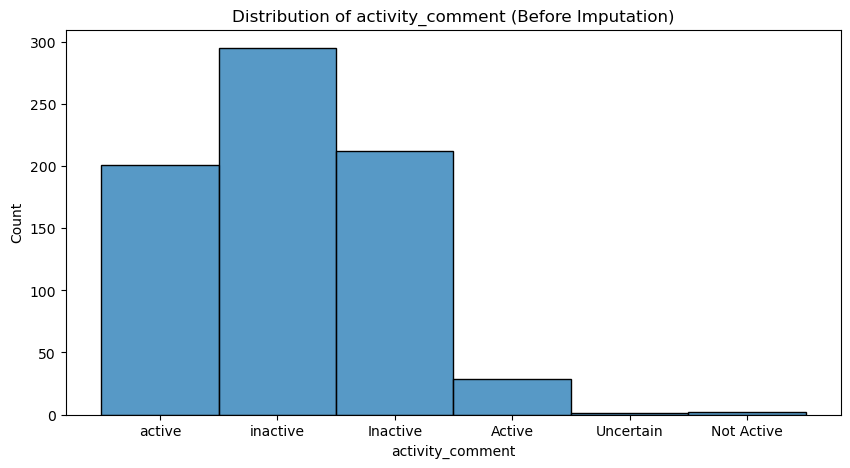

In [32]:
# Distribution of units
plt.figure(figsize=(10, 5))
sns.histplot(bioactivity_df_clean['activity_comment'].dropna(), kde=False)
plt.title('Distribution of activity_comment (Before Imputation)')
plt.show()

**Key Findings**:
- The majority of the entries are categorized as either "active" or "inactive", but "inactive" appears slightly more prevalent.
- There are variations in the capitalization of terms, I will conduct normalization to convert all entries to lowercase
- Since active and inactive more common, I will impute this column with mode, which based on assay_chembl_id column

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


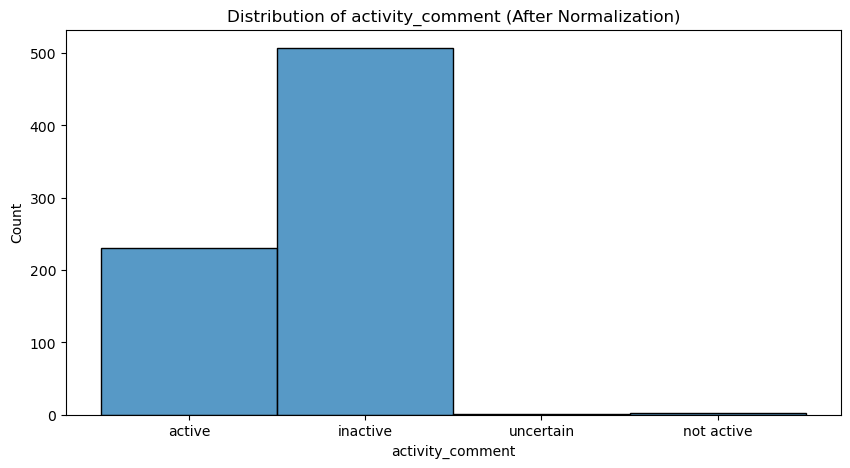

In [33]:
# standardize the activity_comment entries
bioactivity_df_clean['activity_comment'] = bioactivity_df_clean['activity_comment'].str.lower()

# re-evaluate the distribution
plt.figure(figsize=(10, 5))
sns.histplot(bioactivity_df_clean['activity_comment'].dropna(), kde=False)
plt.title('Distribution of activity_comment (After Normalization)')
plt.show()

In [36]:
# imputation for activity_comment using group_based approach
activity_comment_mode = bioactivity_df_clean.groupby('assay_chembl_id')['activity_comment'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
bioactivity_df_clean['activity_comment'] = bioactivity_df_clean['activity_comment'].fillna(bioactivity_df_clean['assay_chembl_id'].map(activity_comment_mode))

# fallback to overall mode if still missing
bioactivity_df_clean['activity_comment'].fillna(bioactivity_df_clean['activity_comment'].mode()[0], inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


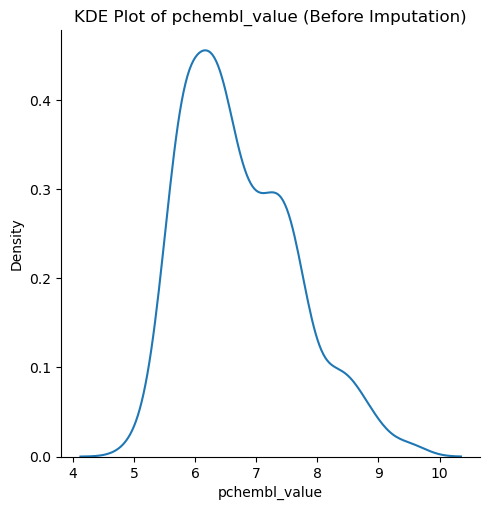

In [37]:
# distribution of pchembl_value
sns.displot(bioactivity_df_clean, x="pchembl_value", kind="kde")
plt.title('KDE Plot of pchembl_value (Before Imputation)')
plt.show()

**Key Findings**:
From the KDE plot, it seems that the `pubchembl_value` is slightly right-skewed. Given this, I will conduct median imputation.

In [38]:
# Impute missing pchembl_value using the median
median_pchembl = bioactivity_df_clean['pchembl_value'].median()
bioactivity_df_clean['pchembl_value'].fillna(median_pchembl, inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


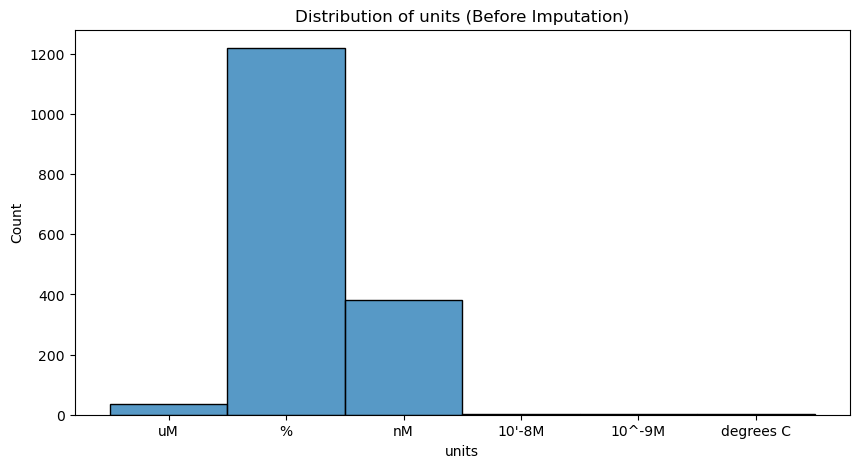

In [39]:
# Distribution of units
plt.figure(figsize=(10, 5))
sns.histplot(bioactivity_df_clean['units'].dropna(), kde=False)
plt.title('Distribution of units (Before Imputation)')
plt.show()

**Key Findings**: 
- The `units` column represents the measurement unit for the bioactivity values. The distribution of the units column shows that most of the data falls under "%", "nM" and few other unit types like "uM". Since this column shows a variety of unit types, I will conduct group-based imputation.
- I will only use value with nM units tocalculate pIC50 value, so I will convert mikro molar to nM and I will drop others.

In [40]:
# Imputation for units column using group-based approach
units_mode = bioactivity_df_clean.groupby('assay_chembl_id')['units'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
bioactivity_df_clean['units'] = bioactivity_df_clean['units'].fillna(bioactivity_df_clean['assay_chembl_id'].map(units_mode))

# Fallback to overall mode if still missing
bioactivity_df_clean['units'].fillna(bioactivity_df_clean['units'].mode()[0], inplace=True)

##### Dataset Missing Value Check after Imputation.

In [41]:
# Check remaining missing values
missing_values_after_imputation = bioactivity_df_clean.isnull().sum()
print(missing_values_after_imputation)

activity_comment             0
activity_id                  0
activity_properties          0
assay_chembl_id              0
assay_description            0
assay_type                   0
bao_endpoint                 0
bao_format                   0
bao_label                    0
canonical_smiles             0
document_chembl_id           0
document_journal             0
molecule_chembl_id           0
molecule_pref_name           0
parent_molecule_chembl_id    0
pchembl_value                0
potential_duplicate          0
qudt_units                   0
record_id                    0
relation                     0
src_id                       0
standard_flag                0
standard_relation            0
standard_type                0
standard_units               0
standard_value               0
target_chembl_id             0
target_organism              0
target_pref_name             0
target_tax_id                0
type                         0
units                        0
uo_units

**Data Cleaning Succeed**

### 4.1.3 Feature Engineering

Next, I will calculate pIC50 values based on IC50(nM) from `standard_value` column using the following formula (9):

$$
\text{pIC50} = -\log_{10}(\text{IC50})
$$

Where IC50 represents the half-maximal inhibitory concentration of substance. The formula converts IC50 values into pIC50 on a logarithmic scale, providing a more convenient representation of inhibitory potency.

Before I calculate pIC50 value, I will fitering out unecessary units.

In [66]:
# filter out rows where units are not nM and µM
bioactivity_df_clean_filtered = bioactivity_df_clean[bioactivity_df_clean['units'].isin(['nM', 'µM'])]

# Convert µM to nM for rows where the units are 'µM'
bioactivity_df_clean_filtered.loc[bioactivity_df_clean_filtered['units'] == 'µM', 'standard_value'] = \
    bioactivity_df_clean_filtered.loc[bioactivity_df_clean_filtered['units'] == 'µM', 'standard_value'] * 1000

# update the units colum after conversion
bioactivity_df_clean_filtered.loc[bioactivity_df_clean_filtered['units'] == 'µM', 'units'] = 'nM'

In [67]:
# calculate pIC50 
bioactivity_df_clean_filtered['pIC50'] = -np.log(bioactivity_df_clean_filtered['standard_value'] / 1e9)

# Check the result
bioactivity_df_clean_filtered[['standard_value', 'pIC50', 'units']].head()

/var/folders/44/bqpfrnqj5f5_klvvx0_3kv780000gn/T/ipykernel_51963/1697407334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioactivity_df_clean_filtered['pIC50'] = -np.log(bioactivity_df_clean_filtered['standard_value'] / 1e9)


,standard_value,pIC50,units
21,440.0,14.636491,nM
28,6.0,18.931506,nM
29,122.0,15.919245,nM
43,12.0,18.238359,nM
46,400.0,14.731801,nM


### 4.2 UniProt Dataset

#### 4.2.1 Data Checking

In [44]:
# show sample data
uniprot_data.head()

,Entry,Entry Name,Protein names,Organism,Length,Sequence
0,P07948,LYN_HUMAN,Tyrosine-protein kinase Lyn (EC 2.7.10.2) (Lck...,Homo sapiens (Human),512,MGCIKSKGKDSLSDDGVDLKTQPVRNTERTIYVRDPTSNKQQRPVP...
1,Q92630,DYRK2_HUMAN,Dual specificity tyrosine-phosphorylation-regu...,Homo sapiens (Human),601,MLTRKPSAAAPAAYPTGRGGDSAVRQLQASPGLGAGATRSGVGTGP...
2,Q14289,FAK2_HUMAN,Protein-tyrosine kinase 2-beta (EC 2.7.10.2) (...,Homo sapiens (Human),1009,MSGVSEPLSRVKLGTLRRPEGPAEPMVVVPVDVEKEDVRILKVCFY...
3,Q07912,ACK1_HUMAN,Activated CDC42 kinase 1 (ACK-1) (EC 2.7.10.2)...,Homo sapiens (Human),1038,MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDL...
4,P17948,VGFR1_HUMAN,Vascular endothelial growth factor receptor 1 ...,Homo sapiens (Human),1338,MVSYWDTGVLLCALLSCLLLTGSSSGSKLKDPELSLKGTQHIMQAG...


In [45]:
# show the information of dataset
uniprot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entry          25 non-null     object
 1   Entry Name     25 non-null     object
 2   Protein names  25 non-null     object
 3   Organism       25 non-null     object
 4   Length         25 non-null     int64 
 5   Sequence       25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [46]:
# show basic statistic
uniprot_data.describe()

,Length
count,25.000000
mean,868.480000
std,517.198634
min,331.000000
25%,512.000000
50%,659.000000
75%,1009.000000
max,2340.000000


**Key Observations**:
- Uniprot dataset contains 6 columns and 25 entries.
- All columns have complete data with no missing values.
- The organism is consistenly "Homo sapiens", confirming the dataset is focused on human proteins.
- There is a significant variance in the length of the protein sequences, with the longest protein 2340 amino acids and the shortest 331 amino acids.
- The format of the title will be corrected using lowercase without space.

In [47]:
# data duplication check
uniprot_data.duplicated().sum()

0

In [48]:
# missing data check
uniprot_data.isna().sum()

Entry            0
Entry Name       0
Protein names    0
Organism         0
Length           0
Sequence         0
dtype: int64

There is no data duplication and missing value in uniport dataset.

#### 4.2.2 Data Cleaning

In [49]:
# remove spaces and convert to lowercase
uniprot_data.columns = uniprot_data.columns.str.replace(' ', '_').str.lower()

# display the updated column names to check
uniprot_data.columns

Index(['entry', 'entry_name', 'protein_names', 'organism', 'length',
       'sequence'],
      dtype='object')

### 4.3 Data Merging

For merging process, I will explore the similarities between the protein entries in the ChEMBL and UniProt datasets. Firstly, I will explore the `target_pref_name` colum from ChEMBL dataset.

In [68]:
bioactivity_df_clean_filtered['target_pref_name'].unique()

array(['Tyrosine-protein kinase FRK'], dtype=object)

**Insigts**: the protein target in the ChEMBL dataset only consists **Tyrosine-protein kinase FRK**, which is I will serach the `protein_names` column of the UniProt dataset for entries containing this particular protein target or related terms.

In [69]:
# check for similarities
search_term = 'FRK'
matching_proteins = uniprot_data[uniprot_data['protein_names'].str.contains(search_term, case=False, na=False)]

# display the matching proteins
print(matching_proteins)

     entry entry_name                protein_names              organism  \
15  P42685  FRK_HUMAN  Tyrosine-protein kinase FRK  Homo sapiens (Human)   

    length                                           sequence  
15     505  MSNICQRLWEYLEPYLPCLSTEADKSTVIENPGALCSPQSQRHGHY...  


There is one entry that contains Tyrosine-protein kinase FRK target in UniProt dataset. Firstly, i will rename the protein name in column `protein_names` to 'Tyrosine-protein kinase FRK' and the perform the merge.

In [70]:
# rename the protein_names to match the target_pref_name
uniprot_data['protein_names'] = uniprot_data['protein_names'].str.replace('Tyrosine-protein kinase FRK (EC 2.7.10.2) (FYN-related kinase) (Nuclear tyrosine protein kinase RAK) (Protein-tyrosine kinase 5)', 'Tyrosine-protein kinase FRK')

In [74]:
# Perform the merge
merged_data = pd.merge(bioactivity_df_clean_filtered, uniprot_data, 
                        left_on='target_pref_name', 
                        right_on='protein_names', 
                        how='inner')

# Check the result
print(merged_data.head())
print(merged_data.columns)


  activity_comment  activity_id activity_properties assay_chembl_id  \
0         inactive      2206919                  []    CHEMBL990554   
1         inactive      2479571                  []    CHEMBL988960   
2         inactive      2479573                  []    CHEMBL988960   
3         inactive      2603062                  []   CHEMBL1023857   
4         inactive      2890919                  []   CHEMBL1060247   

                        assay_description assay_type bao_endpoint  \
0                       Inhibition of Frk          B  BAO_0000034   
1           Binding affinity to human FRK          B  BAO_0000034   
2           Binding affinity to human FRK          B  BAO_0000034   
3                       Inhibition of FRK          B  BAO_0000034   
4  Binding constant for FRK kinase domain          B  BAO_0000034   

    bao_format              bao_label  \
0  BAO_0000357  single protein format   
1  BAO_0000357  single protein format   
2  BAO_0000357  single protein form

#### Exporting to CSV

In [75]:
# Export the DataFrame to a CSV file
merged_data.to_csv('cleaned_bioactivity_data.csv', index=False)

print('Export Succeed')

Export Succeed


### *References*

1. Protein Kinase Signalling Networks in Cancer: [NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3038181/)
2. Kinase phosphorylation mechanisms: [NCBI Bookshelf](https://www.ncbi.nlm.nih.gov/books/NBK6324/)
3. Kinase dysregulation in cancer: [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S153561081930311X)
4. Overview of tyrosine kinase inhibitors: [Nature Reviews Drug Discovery](https://www.nature.com/articles/nrd3627)
5. Targeting BCR-ABL with imatinib: [PubMed](https://pubmed.ncbi.nlm.nih.gov/10825140/)
6. EGFR inhibition by erlotinib: [PubMed](https://pubmed.ncbi.nlm.nih.gov/14634630/)
7. Machine learning in drug discovery: [PubMed](https://pubmed.ncbi.nlm.nih.gov/32069523/)
8. Cheminformatics in drug design: [NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5482274/)
9. PubChem Documentation on Bioactivity Data: [NCBI](https://pubchem.ncbi.nlm.nih.gov/)